In [2]:
import sys
import os

# add Folder1 to path
sys.path.append(os.path.abspath("../Control"))


import datetime
import numpy as np
from scipy import linalg

from rocketpy import Environment, SolidMotor, Rocket, Flight
from rocketpy.control.controller import _Controller
import matplotlib.pyplot as plt
import pandas as pd

import numpy as np

from rocketpy.plots.aero_surface_plots import _TrapezoidalFinsPlots
from rocketpy.prints.aero_surface_prints import _TrapezoidalFinsPrints

from rocketpy.rocket.aero_surface.fins.trapezoidal_fins import TrapezoidalFins


class ourFins(TrapezoidalFins):
    def __init__(
        self,
        n,
        root_chord,
        tip_chord,
        span,
        rocket_radius,
        cant_angle=0,
        sweep_length=None,
        sweep_angle=None,
        airfoil=None,
        name="Fins",
    ):
        super().__init__(
            n,
            root_chord,
            tip_chord,
            span,
            rocket_radius,
            cant_angle,
            sweep_length,
            sweep_angle,
            airfoil,
            name,
        )

        self.aileronAngles = np.array([0,0,0,0])


In [ ]:
df = pd.read_csv("openrocket_data_uncommented.csv")
time = df["# Time (s)"]
long_inertia = df["Longitudinal moment of inertia (kg·m²)"]
stability_margin = df["Stability margin calibers (​)"]
idx = np.where(time == 0.153)[0][0]
stability_margin_launch_rod = stability_margin[idx+1] # first non-nan value after launch rod exit
print("stability margin at launch rod exit: ", stability_margin_launch_rod)
# THIS IS DIFFERENT FROM WHAT ROCKETPY GIVES

stability margin at launch rod exit:  1.248


In [ ]:
coolRocket = Rocket(
    radius=7.87/200,
    mass=2.328,
    inertia=(0.28, 0.002940, 0.002940),
    power_off_drag=0.560,
    power_on_drag=0.580,
    center_of_mass_without_motor=0.679,
    coordinate_system_orientation="nose_to_tail",
    )
    #Remeasure
ourMotor = SolidMotor(
    thrust_source="/Users/dsong/Library/CloudStorage/OneDrive-UniversityofIllinois-Urbana/Club Stuff/LRI/FV-Controls/Dynamics/AeroTech_HP-I280DM.eng",  # Or use a CSV thrust file
    dry_mass=(0.616 - 0.355),  # kg
    burn_time=1.97,  # Corrected burn time

    dry_inertia=(0.00055, 0.00055, 0.00011),  # kg·m² (approximated)
    nozzle_radius= (10 / 1000), 
    grain_number=1,
    grain_density=16929, 
    grain_outer_radius= 0.038/2,  
    grain_initial_inner_radius= 0.037/ 2,
    grain_initial_height= 0.356,  
    grain_separation=0.01,  
    grains_center_of_mass_position=-0.07,  # Estimated
    center_of_dry_mass_position=0.05,  # Estimated
    nozzle_position=-0.28,
    throat_radius= 3.5 / 1000,  
    coordinate_system_orientation="nozzle_to_combustion_chamber",
    )
coolRocket.add_motor(ourMotor, position=0.01*(92.2))
nose_cone = coolRocket.add_nose(
        length=0.19, kind="lvhaack", position=0
    )
    #Boat Tail
    #Verify that it is von karman
tail = coolRocket.add_tail(
        top_radius=0.0787/2, bottom_radius=0.0572/2, length=0.0381, position=1.2019
    )


    #Created in OurFin.py, inherited from rocketpy fins
ourNewFins = ourFins(
        n=4,
        root_chord=0.18,
        tip_chord=0.0597,
        span=0.0876,
        rocket_radius = 7.87/200,
        cant_angle=0.01,
        sweep_length=0.143,

    )
    #Sampling



coolRocket.add_surfaces(ourNewFins, 0.01*(99.9))
    



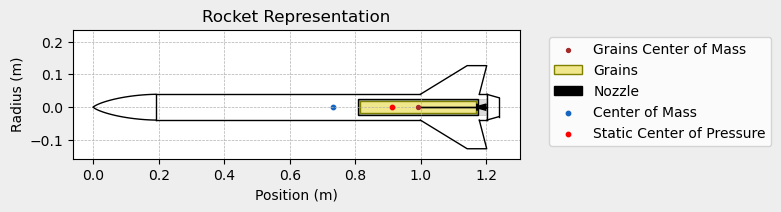

In [8]:
env = Environment(latitude=41.92298772007185, longitude=-88.06013490408121, elevation=243.43)
tomorrow = datetime.date.today() + datetime.timedelta(days=1)
env.set_date((tomorrow.year, tomorrow.month, tomorrow.day, 12))  
env.set_atmospheric_model(type="Forecast", file="GFS")
coolRocket.draw()



In [9]:
test_flight = Flight(
    rocket=coolRocket, environment=env, rail_length=5.2, inclination=85, heading=0
    )

test_flight.prints.out_of_rail_conditions()


Rail Departure State

Rail Departure Time: 0.335 s
Rail Departure Velocity: 32.017 m/s
Rail Departure Stability Margin: 2.376 c
Rail Departure Angle of Attack: 6.892°
Rail Departure Thrust-Weight Ratio: 10.877
Rail Departure Reynolds Number: 1.651e+05
